# Brain Tumour Classification with Support Vector Machine


### Background and Problem Statement

In Singapore, there are over 500 adults and 40 young childrens going for surgical treatments of their brain tumours annually, just in public hospital alone.
<br><br>
Brain tumors represent a significant health challenge worldwide, with a wide range of tumor types, varied clinical presentations, and diverse treatment options. While advancements in imaging techniques such as MRI have improved the detection and characterization of brain tumors, challenges persist in accurately diagnosing, classifying, and effectively treating these tumors. Misdiagnosis, inadequate treatment strategies, and the lack of effective targeted therapies contribute to the morbidity and mortality associated with brain tumors. 
<br><br>
Additionally, the heterogeneity of brain tumors presents a significant obstacle in developing personalized treatment approaches. Furthermore, it may also cause significant symptoms, affecting the quality of life. Therefore, there is an urgent need for further research to enhance our understanding of brain tumor biology, improve diagnostic accuracy, refine treatment strategies, and develop targeted therapies to improve patient outcomes and quality of life. As such, early diagnosis and identification of brain tumour is essential to provide timely treatment.
 <br><br>
 
The aim of this project is to develop an image classification model using computer vision techniques to accurately classify common brain tumours, specifically pituitary tumour, meningioma tumour and glioma tumour. The model should aid and complement in obtaining a preliminary diagnosis of various brain conditions.

**Source** <br>
[Brain Tumour Society Singapore](https://www.braintumoursociety.org.sg/basic-facts-about-brain-tumours/) <br>
[Primary Brain Tumors in Adults: Diagnosis and Treatment](https://www.aafp.org/pubs/afp/issues/2016/0201/p211.html)

### Data Used
[Brain Tumour Classification (MRI) from Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

**Training Folder** <br> glioma_tumor: 826 images <br> meningioma_tumor: 822 images <br> no_tumor 395 images <br> pituitary_tumor: 827 images <br><br>
**Testing Folder** <br> glioma_tumor: 100 images <br> meningioma_tumor: 115 images <br> no_tumor: 105 images <br> pituitary_tumor: 74 images

### Import libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Writing path directory to my files. 

I have 2 folders, namely Training and Testing, whereby within each folder, there are another 2 folders namely no_tumor and meningioma_tumor that contains their respective MRI images. <br> Now, I will write directory path to my training folder

In [2]:
import os

# Specify the directory path
directory = os.listdir('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Training/')
classes = {"no_tumor":0,"meningioma_tumor":1, "glioma_tumor":2, "pituitary_tumor":3}

In [3]:
import cv2

X = []
Y = []

for cls in classes:
    pth = '/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1, 2, 3])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

3    827
2    826
1    822
0    395
dtype: int64

From the output above, there are 395 images with no tumor and 822 images with meningioma images

In [7]:
X.shape

(2870, 200, 200)

### Visualise Data

#### Showing example of images from the training data

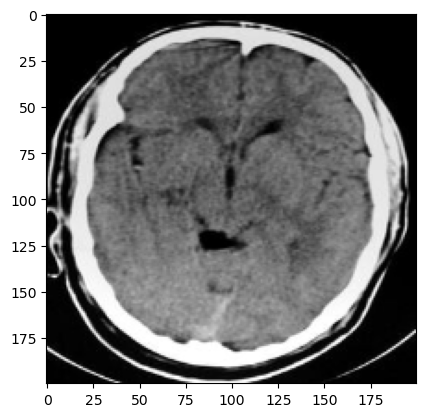

In [8]:
#testing with img 22. Can be altered to visualise any images of interest or concern
plt.imshow(X[22], cmap='gray')

### Prepare Data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

### Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state=10, test_size = 0.2)

In [11]:
X_train.shape, X_test.shape

((2296, 40000), (574, 40000))

### Feature Scaling

In [12]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [13]:
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [78]:
from sklearn.decomposition import PCA

In [15]:
#pca = PCA(.98)
#pca_train = pca.fit_transform(X_train)
#pca_test = pca.transform(X_test)
pca_train = X_train
pca_test = X_test

Eventually commented the PCA Transformation code above. I did not use PCA transformation as the data is most likely non-linear so it may not be appropiate

### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


In [17]:
sv = SVC()
sv.fit(pca_train, y_train)

SVC()

### Evaluation of the models with various metrics

In [19]:
from tabulate import tabulate


sv_train_pred = sv.predict(pca_train)
sv_test_pred = sv.predict(pca_test)

sv_train_scores = [sv.score(pca_train, y_train),
                   precision_score(y_train, sv_train_pred, average='weighted'),
                   recall_score(y_train, sv_train_pred, average='weighted'),
                   f1_score(y_train, sv_train_pred, average='weighted')]

sv_test_scores = [sv.score(pca_test, y_test),
                  precision_score(y_test, sv_test_pred, average='weighted'),
                  recall_score(y_test, sv_test_pred, average='weighted'),
                  f1_score(y_test, sv_test_pred, average='weighted')]


In [20]:
headers = ["Accuracy", "Precision", "Recall", "F1 Score"]
table = [["Support Vector Classifier (Training)"] + sv_train_scores,
         ["Support Vector Classifier (Testing)"] + sv_test_scores]

print(tabulate(table, headers=headers))

                                        Accuracy    Precision    Recall    F1 Score
------------------------------------  ----------  -----------  --------  ----------
Support Vector Classifier (Training)    0.940767     0.941011  0.940767    0.94072
Support Vector Classifier (Testing)     0.829268     0.82703   0.829268    0.826492


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


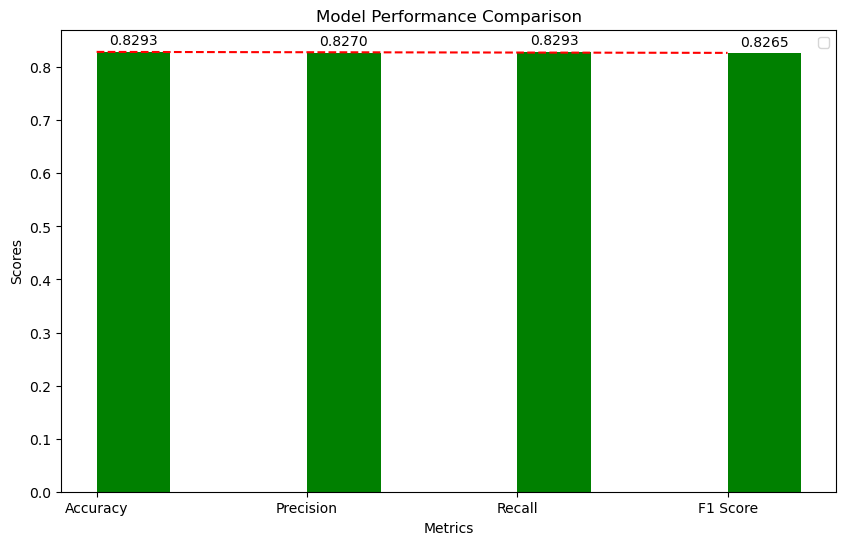

In [45]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
# Define the number of groups and the width of each bar
num_groups = len(labels)
bar_width = 0.35
index = np.arange(num_groups)

# Plot testing scores
test_bars = ax.bar(index + bar_width/2, sv_test_scores, bar_width, color='green')

# Add labels above each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(train_bars)
autolabel(test_bars)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

# Add trend line
x = np.linspace(0, num_groups - 1, num_groups)
z = np.polyfit(x, sv_test_scores, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Show plot
plt.show()

### Prediction

#### To see which images are predicted incorrectly

In [21]:
#The output of this code will show which are the images are predicted incorrectly
pred = sv.predict(pca_test)
np.where(y_test!=pred)

(array([  1,   6,  18,  19,  20,  34,  39,  47,  50,  61,  63,  66,  67,
         68,  76,  79, 117, 119, 126, 137, 143, 144, 147, 148, 151, 165,
        178, 182, 184, 186, 193, 206, 208, 211, 213, 229, 236, 238, 242,
        251, 260, 261, 268, 269, 273, 274, 276, 288, 290, 293, 294, 311,
        317, 319, 326, 328, 339, 341, 344, 353, 354, 356, 358, 361, 365,
        374, 387, 394, 429, 432, 440, 442, 447, 465, 473, 476, 481, 482,
        487, 488, 495, 497, 499, 501, 506, 511, 525, 528, 529, 532, 551,
        557, 559, 562, 563, 569, 572, 573]),)

##### With that, we can then investigate the images individually if needed. Testing of the prediction with image 20. Can be altered to image of interest or concern

In [22]:
# To see what does the model predict image 20 as 
pred[20]
# The model predicted image 20 has a meningioma tumor as the output is 1

1

In [23]:
# To see the real resulf of image 20
y_test[20]
# The model predicted incorrectly as image 20 has glioma tumor represented by the output of 2

2

# Test Model 
### Applying the trained model on unseen test data and visualise the results

In [24]:
#Creating dictionary
dec = {0: "Tumour Negative", 1:"Menigioma Tumour", 2:"Glioma Tumour", 3:"Pituitary Tumour"}

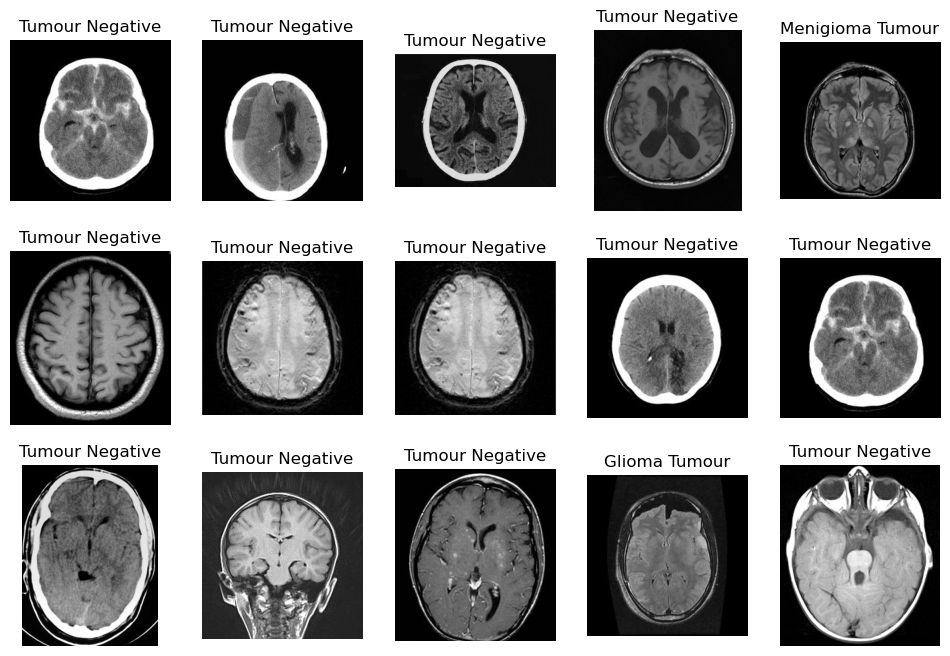

In [37]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
#Writing file directory to my testing folder containing the respective images
p = os.listdir('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/')
c=1
#To test it on the no tumour images first, displaying 9 images in the format of 3x3 and show the result
#The code can be altered to test on different images of interest or concern
for i in os.listdir('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/no_tumor')[:15]:
    plt.subplot(3,5,c)
    
    img = cv2.imread('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/no_tumor/'+i, 0) # Added '/' after 'no_tumor'
    if img is not None:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1, -1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        c+=1
    else:
        print("Image {} cannot be read".format(i))

plt.show()

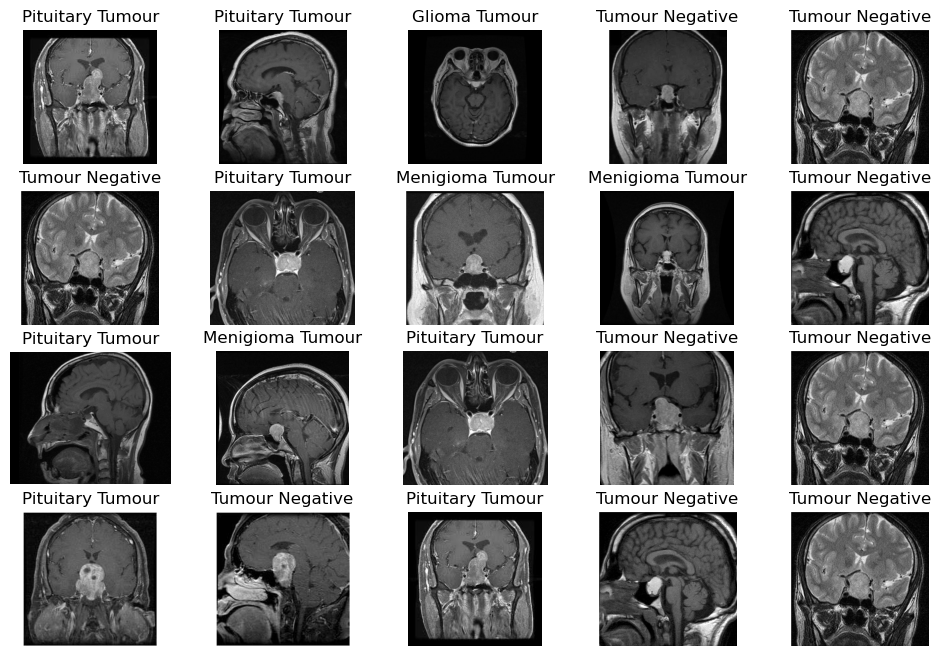

In [36]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
#Writing file directory to my testing folder containing the respective images
p = os.listdir('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/')
c=1
#To test it on the meningioma tumour images, displaying 16 images in the format of 4x4 and show the result
#The code can be altered to test on different images of interest or concern
for i in os.listdir('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/pituitary_tumor')[:20]:
    plt.subplot(4,5,c)
    
    img = cv2.imread('/Users/kermingseaw/Documents/Self-Data Science Practice/BrainTumour/Data/Testing/pituitary_tumor/'+i, 0) # Added '/' after 'no_tumor'
    if img is not None:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1, -1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        c+=1
    else:
        print("Image {} cannot be read".format(i))

plt.show()

## Conclusion

In conclusion, I have successfully trained and developed an image classification model with Support Vector Machine modelling in this project to predict brain tumours fairly accurately. This comprehensive solution provides healthcare provider with the means to obtain reliable preliminary findings. This should complements with the knowledge of medical professionals to obtain an accurate diagnosis for the patient.

## Recommendations 

1. Incorporation with healthcare institution and collaboration with radiologists<br>
- This is not meant to replace radiologist fully in providing diagnosis for the patient, but rather aids and complements with the knowledge that they have, making it a more seamless and faster process of providing a diagnosis for the patients <br>
- A by-product of such modelling can also be considered to be integrated into a telemedicine features and digitalisation of medical images, providing patients the convenience of obtaining their images without the need of leaving their houses<br><br>
2. Continuing modelling improvement and alternative models with expansion of dataset<br>
- More data, particularly from Singapore, can be collected to expand the dataset to improve the model's reproducibility and capability in the local context<br>
- Alternative modelling such as deep learning algorithms can be considered especially with a larger dataset to better handle the increased complexity in the future